# PCA for House Price Prediction



We will cover the following steps:

1. Loading the dataset
2. Standardizing the data
3. Applying PCA
4. Examining the explained variance
5. Visualizing the PCA-reduced data
6. Building a regression model using the PCA components
7. Evaluating the regression model

Let's get started!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn

from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Enable inline plotting for Jupyter Notebook
%matplotlib inline

# Set a style for plots
# plt.style.use('seaborn')  # Remove this line 
sns.set_theme(style="darkgrid") # Use seaborn's set_theme to apply a seaborn style, like 'darkgrid'

## Step 1: Load the Dataset

We use the California Housing dataset available from scikit-learn. This dataset contains information about various districts in California, with features such as median income, house age, average number of rooms, etc. The target variable is the median house value.

Let's load the dataset and inspect its first few rows.

In [3]:
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target  # target: median house value

# Display the first 5 rows of the dataset
print("First 5 rows of the California Housing dataset:")
print(X.head())

First 5 rows of the California Housing dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


## Step 2: Standardize the Data

PCA is sensitive to the scale of the features. If the features are measured in different units, those with larger scales can dominate the PCA results. Therefore, it is important to standardize the dataset so that each feature has a mean of 0 and a standard deviation of 1.

Let's standardize the data using `StandardScaler`.

In [13]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# X_scaled is now a NumPy array with standardized features
print("Shape of standardized data:", X_scaled.shape)
display(X_scaled[:5])

Shape of standardized data: (20640, 8)


array([[ 2.34476576,  0.98214266,  0.62855945, -0.15375759, -0.9744286 ,
        -0.04959654,  1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, -0.26333577,  0.86143887,
        -0.09251223,  1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, -0.04901636, -0.82077735,
        -0.02584253,  1.03850269, -1.33282653],
       [ 0.93296751,  1.85618152,  0.15696608, -0.04983292, -0.76602806,
        -0.0503293 ,  1.03850269, -1.33781784],
       [-0.012881  ,  1.85618152,  0.3447108 , -0.03290586, -0.75984669,
        -0.08561576,  1.03850269, -1.33781784]])

## Step 3: Apply PCA

Now that our data is standardized, we can apply PCA. In this example, we will reduce the dataset to **2 principal components**. These components are linear combinations of the original features and capture the maximum variance in the data.

Let's apply PCA and transform the data.

In [14]:
# Set the number of principal components
n_components = 2

# Create a PCA instance and apply it to the standardized data
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Display the shape of the PCA-transformed data
print("Shape of PCA-transformed data:", X_pca.shape)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Shape of PCA-transformed data: (20640, 2)


## Step 4: Examine the Explained Variance Ratio

The **explained variance ratio** tells us the percentage of the dataset's total variance that is captured by each principal component. This helps us understand how much information is retained after reducing the dimensions.

Let's print the explained variance ratio for the two principal components.

In [15]:
# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"\nExplained Variance Ratio for {n_components} components:")
for i, ratio in enumerate(explained_variance, 1):
    print(f"Principal Component {i}: {ratio:.2%}")


Explained Variance Ratio for 2 components:
Principal Component 1: 25.34%
Principal Component 2: 23.52%


## Step 5: Visualize the PCA-Reduced Data

To understand how the data looks in the reduced dimension space, we create a scatter plot of the two principal components. The points are colored based on the median house value (target variable), which allows us to see if any patterns emerge.

Let's create the visualization.

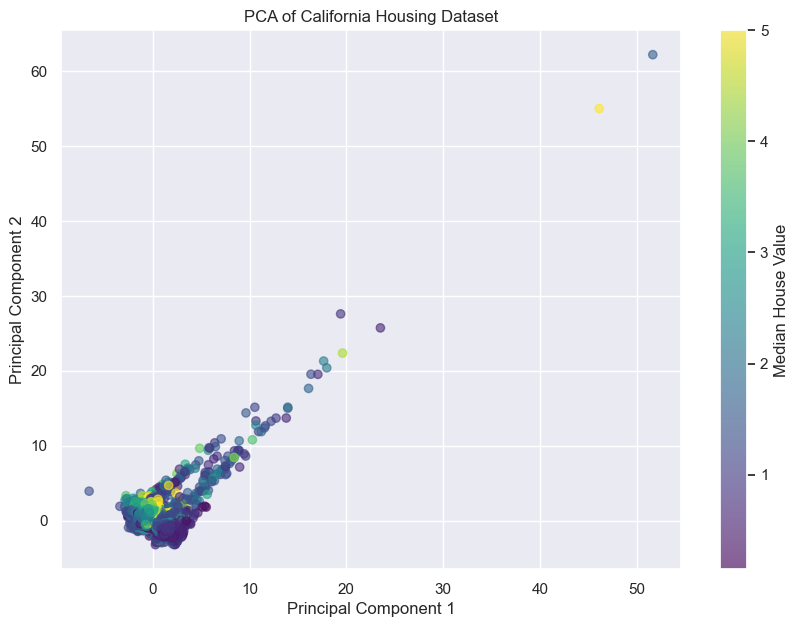

In [16]:
# Create a scatter plot of the PCA-reduced data
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of California Housing Dataset")
cbar = plt.colorbar(scatter)
cbar.set_label("Median House Value")
plt.grid(True)
plt.show()